In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [36]:
load_dataset = pd.read_csv("final_dataset.csv")
load_dataset

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,ANDAMAN,2001,13,0,0,3,0,3,2,...,4,113,0,18,1,9,0,0,310,637
1,A & N ISLANDS,NICOBAR,2001,0,0,0,0,0,0,0,...,0,5,0,1,0,0,0,0,13,21
2,A & N ISLANDS,TOTAL,2001,13,0,0,3,0,3,2,...,4,118,0,19,1,9,0,0,323,658
3,A & N ISLANDS,ANDAMAN,2002,14,3,0,1,0,1,2,...,2,92,0,16,3,4,0,0,316,580
4,A & N ISLANDS,NICOBAR,2002,3,0,1,1,0,1,0,...,0,5,0,1,0,0,0,0,12,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10673,West Bengal,Sealdah G. R. P.,2014,23,11,0,0,7,0,0,...,0,43,0,0,0,0,346,2,344,47
10674,West Bengal,Siliguri G. R. P.,2014,8,2,0,0,1,0,0,...,1,0,1,0,0,0,148,0,148,0
10675,West Bengal,Siliguri PC,2014,46,49,7,0,72,0,0,...,0,0,15,3,3,0,1125,450,675,34
10676,West Bengal,Uttar Dinajpur,2014,90,346,10,0,187,0,0,...,8,15,63,4,3,1,721,204,517,72


In [3]:
load_dataset = load_dataset.drop(['CUSTODIAL RAPE', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1)

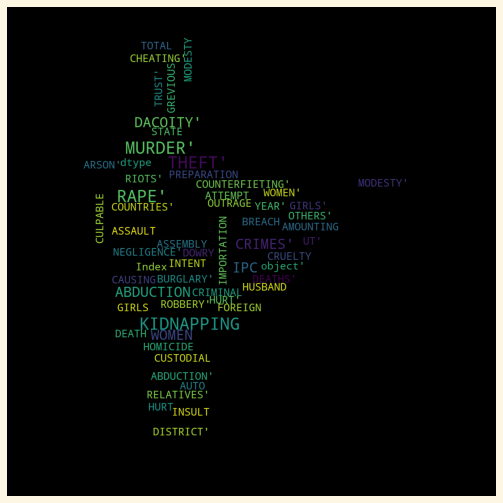

In [37]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from scipy.ndimage import gaussian_gradient_magnitude

india_map = np.array(Image.open("india.png"))
india_map = india_map[::3, ::3]
india_mask = india_map.copy()
india_mask[india_mask.sum(axis=2) == 0] = 255
edges = np.mean([gaussian_gradient_magnitude(india_map[:, :, i] / 255., 2) for i in range(3)], axis=0)
india_mask[edges > .08] = 255
wc = WordCloud(background_color= 'black', max_words=2000, mask=india_mask, max_font_size=40, random_state=42,width = 1500, height = 1500).generate(str(load_dataset.columns))
plt.axis("off")
plt.imshow(wc)

In [5]:
#Format the values of district
district=[]
for i in load_dataset['DISTRICT']:
    if 'and' in i:
        district.append(i)
    elif ' ' in i:
        temp=i.find(' ')
        if i.count(' ')==1 and temp<len(i)-1:
            district.append(i[0]+i[1:temp+1].lower()+i[temp+1]+i[temp+2:].lower())
        else:
            district.append(i)
    else:
        district.append(i[0]+i[1:].lower())

In [6]:
state=[]
for i in load_dataset['STATE/UT']:
    if 'and' in i:
        state.append(i)
    elif ' ' in i:
        temp=i.find(' ')
        if i.count(' ')==1 and temp<len(i)-1:
            state.append(i[0]+i[1:temp+1].lower()+i[temp+1]+i[temp+2:].lower())
        else:
            state.append(i)
    else:
        state.append(i[0]+i[1:].lower())

load_dataset['STATE/UT']=state

In [7]:
load_dataset.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'OTHER RAPE',
       'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [8]:
load_dataset['DISTRICT']=district
load_dataset['STATE/UT']==state


0        True
1        True
2        True
3        True
4        True
         ... 
10673    True
10674    True
10675    True
10676    True
10677    True
Name: STATE/UT, Length: 10678, dtype: bool

In [9]:
#To calculate all total IPC in a district from 2001-14
TotalIPC=pd.DataFrame({'DISTRICT':district,'Total':load_dataset['TOTAL IPC CRIMES']})
finalTotalIPC=dict()
for i in district:
    finalTotalIPC[i]=sum(TotalIPC[TotalIPC['DISTRICT']==i]['Total'])

In [10]:
#To calculate all other small IPC crimes in a district from 2001-14
OtherIPC=pd.DataFrame({'DISTRICT':district,'Other':load_dataset['OTHER IPC CRIMES']})
finalOtherIPC=dict()
for i in district:
    finalOtherIPC[i]=sum(OtherIPC[TotalIPC['DISTRICT']==i]['Other'])

In [11]:
#To calculate all arson and assault in a district from 2001-14
assault=pd.DataFrame({'DISTRICT':district,'Arson':load_dataset['ARSON'], 'Others':load_dataset['HURT/GREVIOUS HURT']})
finalassault=dict()
for i in district:
    temp=assault[assault['DISTRICT']==i]
    finalassault[i]=sum(temp['Arson'])+sum(temp['Others'])

In [12]:
#To calculate all cheating/fraud in a district from 2001-14
fraud=pd.DataFrame({'district':district,'breach_trust':load_dataset['CRIMINAL BREACH OF TRUST'],'cheating':load_dataset['CHEATING'],'counterfieting':load_dataset['COUNTERFIETING']})
finalfraud=dict()
for i in district:
    temp=fraud[fraud['district']==i]
    finalfraud[i]=sum(temp['breach_trust'])+sum(temp['cheating'])+sum(temp['counterfieting'])

In [13]:
#To calculate all murders in a district from 2001-14
murder=pd.DataFrame({'DISTRICT':district,'Murder':load_dataset['MURDER']})
finalmurder=dict()
for i in district:
    finalmurder[i]=sum(murder[murder['DISTRICT']==i]['Murder'])

In [14]:
#To calculate all attempt to murders in a district from 2001-14
homicides=pd.DataFrame({'DISTRICT':district,'Homicide':load_dataset['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'], 'Attempt': load_dataset['ATTEMPT TO MURDER']})
finalhomicides=dict()
for i in district:
    temp = homicides[homicides['DISTRICT']==i]
    finalhomicides[i]=sum(temp['Homicide']) + sum(temp['Attempt'])

In [15]:
#To calculate all theft in a district from 2001-14
theft=pd.DataFrame({'district':district,'theft':load_dataset['THEFT'],'robbery':load_dataset['ROBBERY'],'burglary':load_dataset['BURGLARY'], 'dacoity': load_dataset['DACOITY'], 'autotheft': load_dataset['AUTO THEFT'], 'Others': load_dataset['OTHER THEFT']})
finaltheft=dict()
for i in district:
    temp=theft[theft['district']==i]
    finaltheft[i]=sum(temp['theft'])+sum(temp['robbery'])+sum(temp['burglary'])+sum(temp['autotheft'])+sum(temp['Others'])

In [16]:
#To calculate all crime against women in a district from 2001-14
women=pd.DataFrame({'district':district,'kidnap':load_dataset['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],'rape':load_dataset['RAPE'],'assault':load_dataset['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],'insult':load_dataset['INSULT TO MODESTY OF WOMEN'],'husband':load_dataset['CRUELTY BY HUSBAND OR HIS RELATIVES'],'dowry':load_dataset['DOWRY DEATHS']})
finalwomen=dict()
for i in district:
    temp=women[women['district']==i]
    finalwomen[i]=sum(temp['rape'])+sum(temp['kidnap'])+sum(temp['assault'])+sum(temp['insult'])+sum(temp['husband'])+sum(temp['dowry'])

In [17]:
#To calculate all kidnapping in a district from 2001-14
kidnap=pd.DataFrame({'DISTRICT':district,'Kidnapping':load_dataset['KIDNAPPING & ABDUCTION'], 'Others':load_dataset['KIDNAPPING AND ABDUCTION OF OTHERS']})
finalkidnap=dict()
for i in district:
    temp=kidnap[kidnap['DISTRICT']==i]
    finalkidnap[i]=sum(temp['Kidnapping'])+sum(temp['Others'])

In [18]:
TotalIPC=pd.DataFrame({'district':finalTotalIPC.keys(),'TotalIPC':finalTotalIPC.values()})
OtherIPC=pd.DataFrame({'district':finalOtherIPC.keys(),'OtherIPC':finalOtherIPC.values()})
Assault=pd.DataFrame({'district':finalassault.keys(),'Assault':finalassault.values()})
Fraud=pd.DataFrame({'district':finalfraud.keys(),'Fraud':finalfraud.values()})
Murder=pd.DataFrame({'district':finalmurder.keys(),'Murder':finalmurder.values()})
Homicides=pd.DataFrame({'district':finalhomicides.keys(),'Homicides':finalhomicides.values()})
Theft=pd.DataFrame({'district':finaltheft.keys(),'Theft':finaltheft.values()})
Women=pd.DataFrame({'district':finaltheft.keys(),'Women':finalwomen.values()})
Kidnap=pd.DataFrame({'district':finalkidnap.keys(),'Kidnap':finalkidnap.values()})

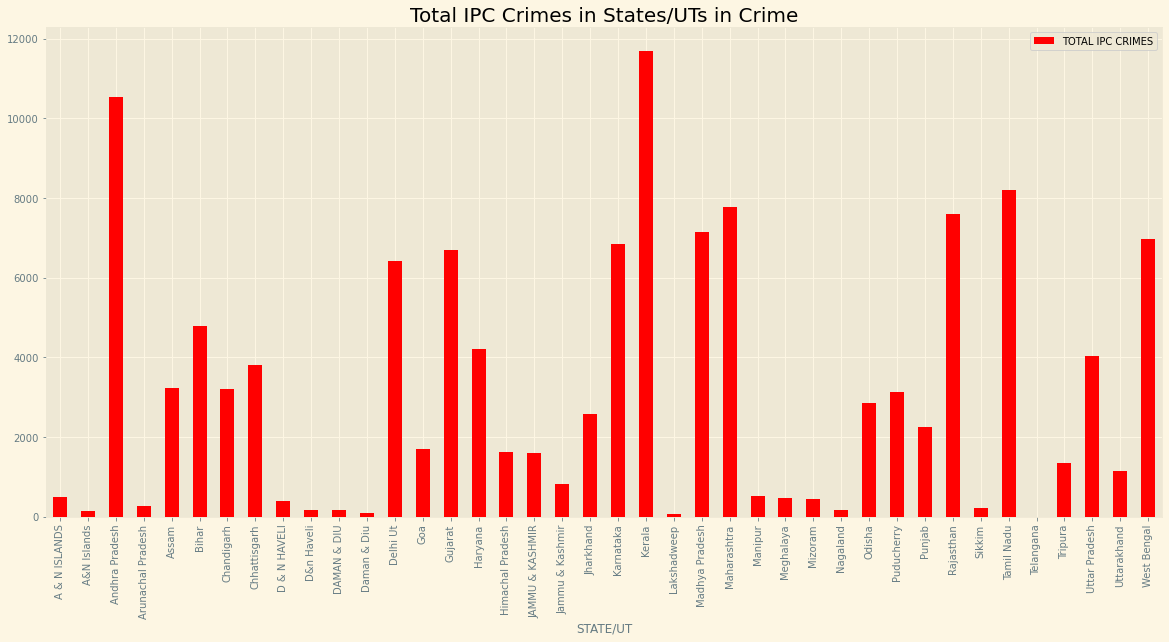

In [19]:
# Regions with count of crimes
df = pd.DataFrame(load_dataset)
df = df[['STATE/UT', 'TOTAL IPC CRIMES']]
df = df.set_index(['STATE/UT'])
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

df.groupby(level="STATE/UT").mean().plot.bar(color = 'red')
print()

plt.title('Total IPC Crimes in States/UTs in Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [20]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp" 
map_df=gpd.read_file(fp)
map_df = map_df[['NAME_2', 'geometry']]

In [21]:

mergedtotalipc = map_df.set_index('NAME_2').join(TotalIPC.set_index('district'))
mergedotheripc = map_df.set_index('NAME_2').join(OtherIPC.set_index('district'))
mergedassault = map_df.set_index('NAME_2').join(Assault.set_index('district'))
mergedfraud = map_df.set_index('NAME_2').join(Fraud.set_index('district'))
mergedmurder = map_df.set_index('NAME_2').join(Murder.set_index('district'))
mergedhomicides = map_df.set_index('NAME_2').join(Homicides.set_index('district'))
mergedtheft=map_df.set_index('NAME_2').join(Theft.set_index('district'))
mergedwomen=map_df.set_index('NAME_2').join(Women.set_index('district'))
mergedkidnap = map_df.set_index('NAME_2').join(Kidnap.set_index('district'))

In [22]:
#Removing the null(NaN) values after merging of the 2 lists
mergedtotalipc['TotalIPC'].fillna(mergedtotalipc['TotalIPC'].mean(), inplace=True)
mergedotheripc['OtherIPC'].fillna(mergedotheripc['OtherIPC'].mean(), inplace=True)
mergedassault['Assault'].fillna(mergedassault['Assault'].mean(), inplace=True)
mergedfraud['Fraud'].fillna(mergedfraud['Fraud'].mean(), inplace=True)
mergedhomicides['Homicides'].fillna(mergedhomicides['Homicides'].mean(), inplace=True)
mergedkidnap['Kidnap'].fillna(mergedkidnap['Kidnap'].mean(), inplace=True)
mergedmurder['Murder'].fillna(mergedmurder['Murder'].mean(), inplace=True)
mergedtheft['Theft'].fillna(mergedtheft['Theft'].mean(), inplace=True)
mergedwomen['Women'].fillna(mergedwomen['Women'].mean(), inplace=True)

<AxesSubplot:title={'center':'Murder Crimes in India'}>

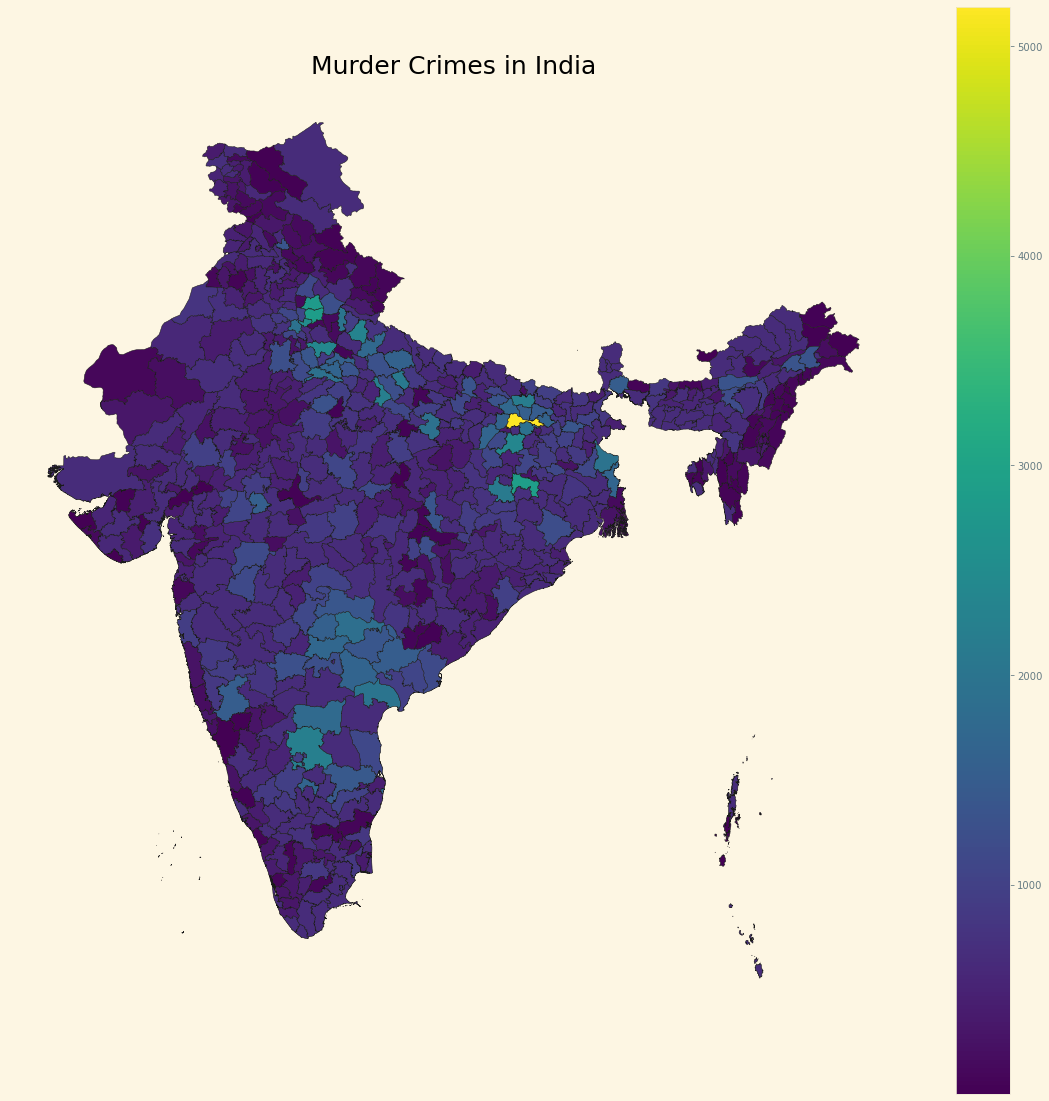

In [23]:
fig, ax = plt.subplots(1, figsize=(20,20))
plt.axis('off')
ax.set_title("Murder Crimes in India", fontdict={'fontsize': '25', 'fontweight' : '3'})
mergedmurder.plot(column='Murder', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='0.1', legend=True)

<AxesSubplot:title={'center':'Theft In India'}>

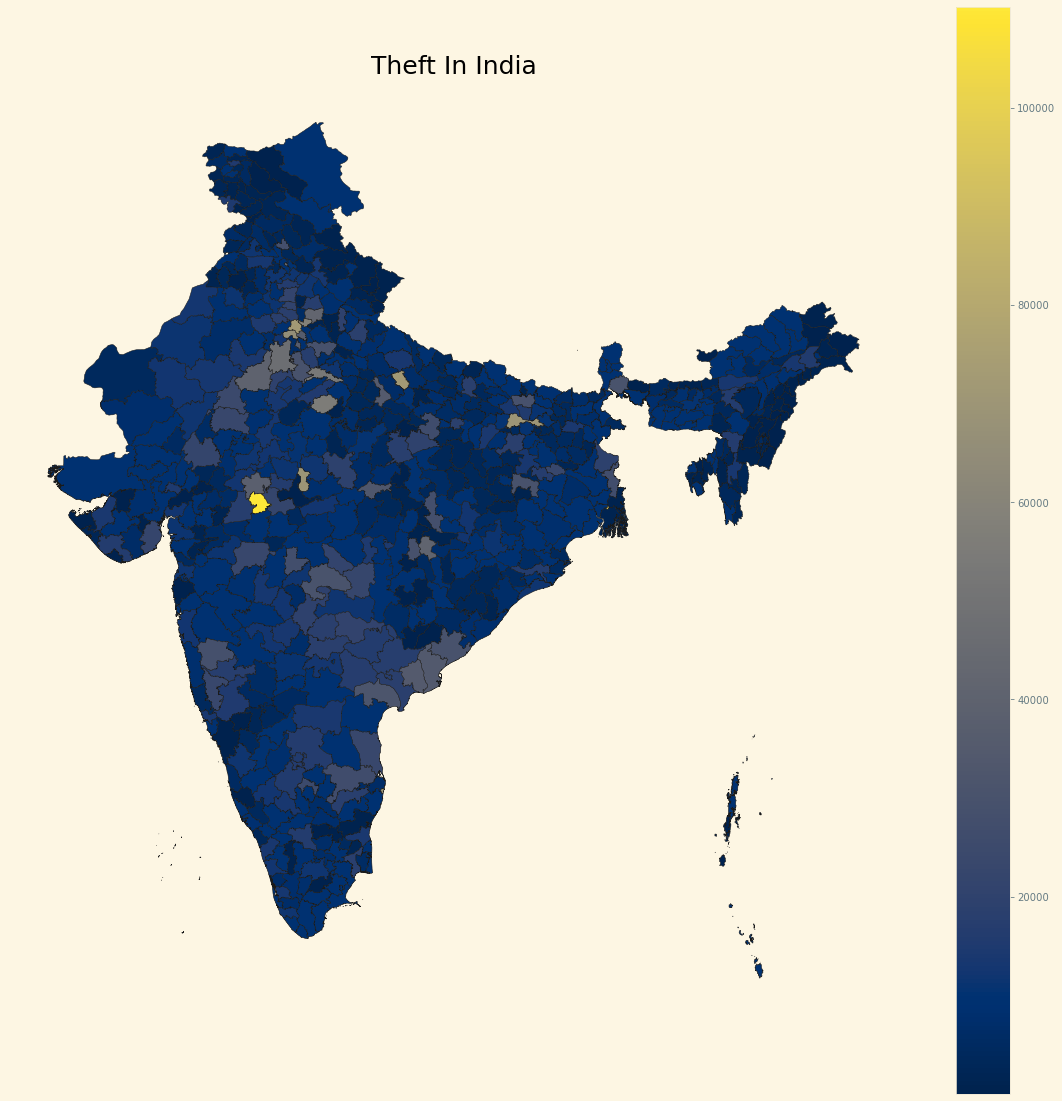

In [24]:
fig, ax = plt.subplots(1, figsize=(20,20))
ax.set_title("Theft In India", fontdict={'fontsize': '25', 'fontweight' : '3'})
plt.axis('off')
mergedtheft.plot(column='Theft', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.1', legend=True)

<AxesSubplot:title={'center':'Crimes Against Women'}>

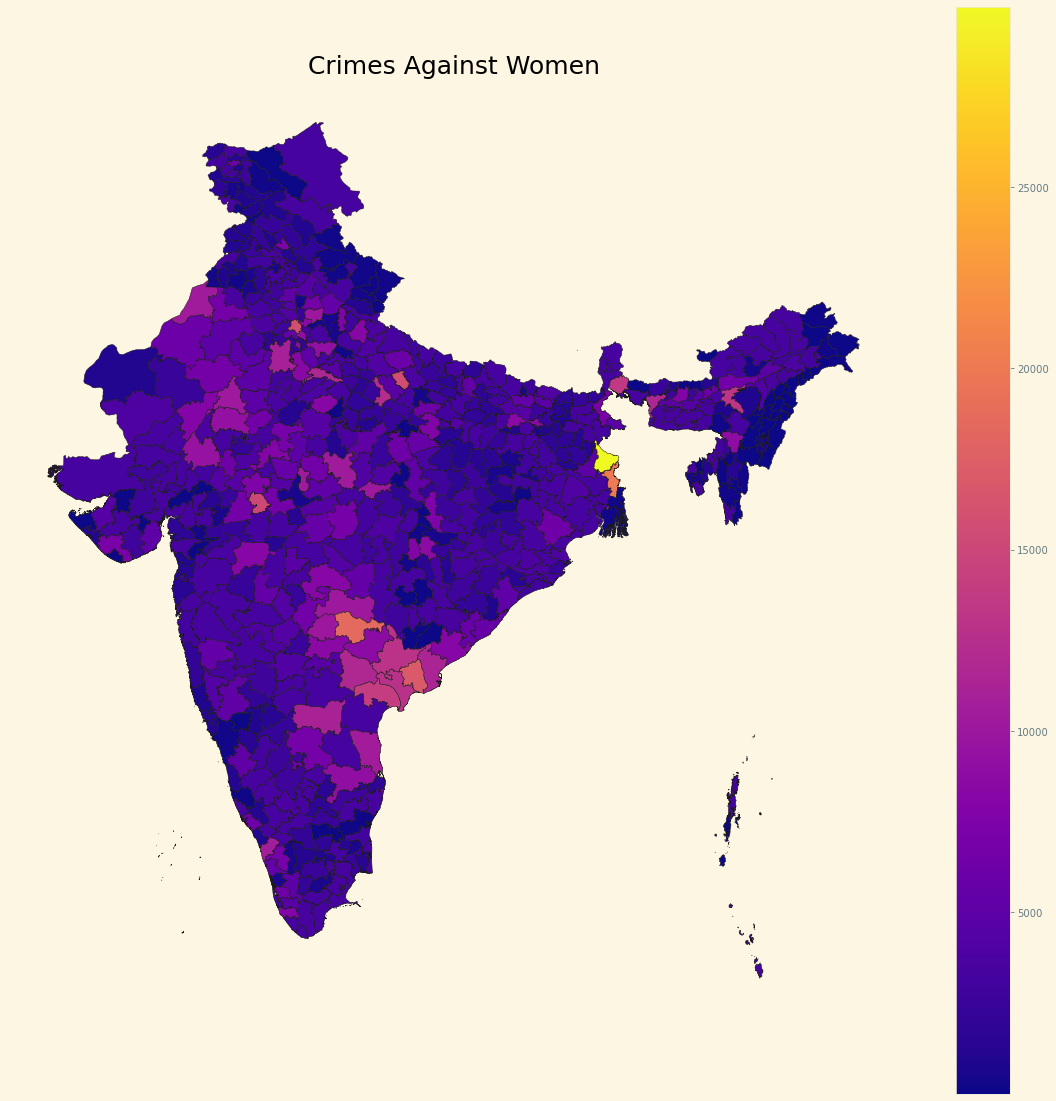

In [25]:
fig, ax = plt.subplots(1, figsize=(20,20))
plt.axis('off')
ax.set_title("Crimes Against Women", fontdict={'fontsize': '25', 'fontweight' : '3'})
mergedwomen.plot(column='Women', cmap='plasma', linewidth=0.5, ax=ax, edgecolor='0.1', legend=True)

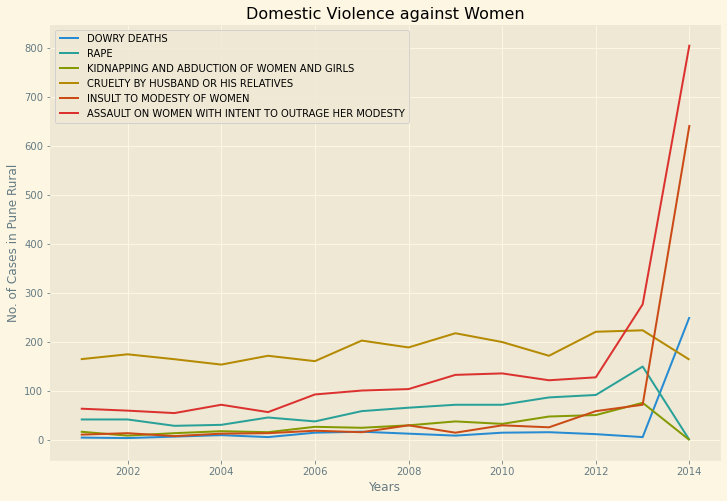

In [35]:
def year_wise_women(district):
    district_crime = load_dataset[load_dataset['DISTRICT'] == district]
    district_crime.set_index('YEAR')[['DOWRY DEATHS','RAPE','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'CRUELTY BY HUSBAND OR HIS RELATIVES','INSULT TO MODESTY OF WOMEN','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']].plot(kind = 'line', figsize = (12,8))
    plt.xlabel('Years')
    plt.ylabel('No. of Cases in '+district)
    plt.title('Domestic Violence against Women')
    return plt
    
year_wise_women('Pune Rural').show()

In [26]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp"
map_df = gpd.read_file(fp)
district='Assam'
crime='MURDER'

In [27]:
map_df['NAME_1'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [28]:
map_df = map_df[['NAME_1', 'NAME_2', 'geometry']]
map_df = map_df[map_df['NAME_1']==district]

In [29]:
district_wise = load_dataset[['STATE/UT', 'DISTRICT', crime]]
district_wise = district_wise[district_wise['STATE/UT']==district]
district_wise.head()

,STATE/UT,DISTRICT,MURDER
703,Assam,Barpeta,64
704,Assam,Bongaigaon,45
705,Assam,C.i.d.,0
706,Assam,Cachar,52
707,Assam,Darrang,61


In [30]:
merged = map_df.set_index('NAME_2').join(district_wise.set_index('DISTRICT'))
merged[crime].fillna(merged[crime].mean(), inplace=True)
merged.head()

,NAME_1,geometry,STATE/UT,MURDER
Baksa,Assam,"POLYGON ((91.78369 26.49809, 91.78181 26.49697...",Assam,38.0
Baksa,Assam,"POLYGON ((91.78369 26.49809, 91.78181 26.49697...",Assam,42.0
Barpeta,Assam,"POLYGON ((91.29124 26.57613, 91.29190 26.57254...",Assam,64.0
Barpeta,Assam,"POLYGON ((91.29124 26.57613, 91.29190 26.57254...",Assam,43.0
Barpeta,Assam,"POLYGON ((91.29124 26.57613, 91.29190 26.57254...",Assam,46.0


<AxesSubplot:title={'center':'Assam Murder'}>

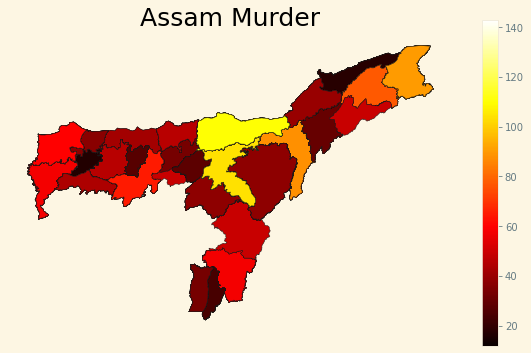

In [31]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title(district+" " + crime.capitalize(), fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column=crime, cmap='hot', linewidth=0.5, ax=ax, edgecolor='0.1', legend=True)

<AxesSubplot:title={'center':'Bihar Murder'}>

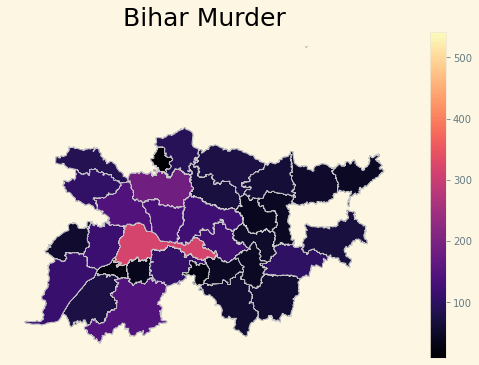

In [32]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp"
map_df = gpd.read_file(fp)
state="Bihar"
crime="MURDER"
map_df = map_df[['NAME_1', 'NAME_2', 'geometry']]
map_df = map_df[map_df['NAME_1']==state]
district_wise = load_dataset[['STATE/UT', 'DISTRICT', crime]]
district_wise = district_wise[district_wise['STATE/UT']==state]
merged = map_df.set_index('NAME_2').join(district_wise.set_index('DISTRICT'))
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title(state+" " + crime.capitalize(), fontdict={'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged.plot(column=crime, cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)